# Movie Lens Project Exploratory Data Analysis

In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

### Import the three datasets-->users,movies,ratings

In [2]:
# Read files

users_df = pd.read_csv("Movielens_Dataset/users.dat", delimiter="::", names=['UserID','Gender','Age','Occupation','Zip-code'])
movies_df = pd.read_csv("Movielens_Dataset/movies.dat", delimiter="::", names=['MovieID','Title','Genres'])
ratings_df = pd.read_csv("Movielens_Dataset/ratings.dat", delimiter="::", names=['UserID','MovieID','Rating','Timestamp'])

<ipython-input-2-ecdf60fc32c6>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users_df = pd.read_csv("Movielens_Dataset/users.dat", delimiter="::", names=['UserID','Gender','Age','Occupation','Zip-code'])
<ipython-input-2-ecdf60fc32c6>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = pd.read_csv("Movielens_Dataset/movies.dat", delimiter="::", names=['MovieID','Title','Genres'])
<ipython-input-2-ecdf60fc32c6>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); 

In [3]:
print(users_df.head())

   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


In [4]:
print(movies_df.head())

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [5]:
print(ratings_df.head())

   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


### Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [6]:
# Creating Master data from 3 datasets
temp_df_1 = pd.merge(users_df,ratings_df, on='UserID')
temp_df_2 = pd.merge(temp_df_1,movies_df, on='MovieID')
Master_Data = temp_df_2[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating']]

In [7]:
print('Shape=', Master_Data.shape)
print(Master_Data)

Shape= (1000209, 7)
         MovieID                                        Title  UserID  Age  \
0           1193       One Flew Over the Cuckoo's Nest (1975)       1    1   
1           1193       One Flew Over the Cuckoo's Nest (1975)       2   56   
2           1193       One Flew Over the Cuckoo's Nest (1975)      12   25   
3           1193       One Flew Over the Cuckoo's Nest (1975)      15   25   
4           1193       One Flew Over the Cuckoo's Nest (1975)      17   50   
...          ...                                          ...     ...  ...   
1000204     2198                           Modulations (1998)    5949   18   
1000205     2703                        Broken Vessels (1998)    5675   35   
1000206     2845                            White Boys (1999)    5780   18   
1000207     3607                     One Little Indian (1973)    5851   18   
1000208     2909  Five Wives, Three Secretaries and Me (1998)    5938   25   

        Gender  Occupation  Rating  
0     

## Exploratory Data Analysis

### Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
### 1.User Age Distribution

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

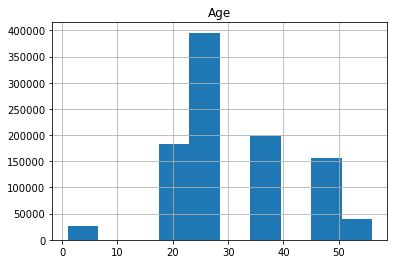

In [8]:
# User age distribution(without bins specified)

Master_Data.hist(column='Age')

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

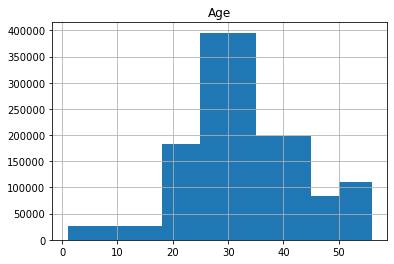

In [9]:
# Histogram based on bins specified

specified_bins = [1, 18, 25, 35, 45, 50, 56]
Master_Data.hist(column='Age', bins = specified_bins)

### 2. User rating of the movie “Toy Story”

In [10]:
# Assuming "Toy Story" == "Toy Story(1995)" , MovieID is 1

Master_Data[Master_Data['Title'].str.contains('Toy Story')]

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
41626,1,Toy Story (1995),1,1,F,10,5
41627,1,Toy Story (1995),6,50,F,9,4
41628,1,Toy Story (1995),8,25,M,12,4
41629,1,Toy Story (1995),9,25,M,17,5
41630,1,Toy Story (1995),10,35,F,1,5
...,...,...,...,...,...,...,...
56826,3114,Toy Story 2 (1999),6022,25,M,17,5
56827,3114,Toy Story 2 (1999),6024,25,M,12,4
56828,3114,Toy Story 2 (1999),6027,18,M,4,4
56829,3114,Toy Story 2 (1999),6036,25,F,15,4


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

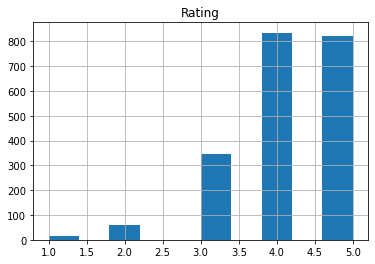

In [11]:
# User rating of the movie "Toy Story"

Master_Data[Master_Data['MovieID'] == 1].hist(column='Rating')

In [12]:
# Statistics of 'Toy Story' movie

Master_Data[Master_Data['MovieID'] == 1].describe()['Rating']

count    2077.000000
mean        4.146846
std         0.852349
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

### 3. Top 25 movies by viewership rating

In [13]:
# Sort movies data by rating

Most_Viewership_Rating = Master_Data.groupby('Title').size()
Most_Viewership_Rating

Title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

In [14]:
# 25 most rated movies
Most_Viewership_Rating.sort_values(ascending=False)[:25]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

### 4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [15]:
# Filter dataframe, of user_id = 2696

user_2696 = Master_Data[Master_Data['UserID'] == 2696]
print('Number of ratings given by user 2696 =', user_2696.shape[0])
user_2696

Number of ratings given by user 2696 = 20


,MovieID,Title,UserID,Age,Gender,Occupation,Rating
24345,1270,Back to the Future (1985),2696,25,M,7,2
29848,1097,E.T. the Extra-Terrestrial (1982),2696,25,M,7,3
244232,1617,L.A. Confidential (1997),2696,25,M,7,4
250014,800,Lone Star (1996),2696,25,M,7,5
273633,3386,JFK (1991),2696,25,M,7,1
277808,3176,"Talented Mr. Ripley, The (1999)",2696,25,M,7,4
371178,1711,Midnight in the Garden of Good and Evil (1997),2696,25,M,7,4
377250,1589,Cop Land (1997),2696,25,M,7,3
598042,1783,Palmetto (1998),2696,25,M,7,4
603189,1892,"Perfect Murder, A (1998)",2696,25,M,7,4


## Feature Engineering

### Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [16]:
genre_split = movies_df['Genres'].apply(lambda x:x.split('|'))

In [17]:
list_ = []
for i in genre_split:
    list_.extend(genre for genre in i)
unique_genre_list = set(list_)
print('Unique Genre List :',list(unique_genre_list))

Unique Genre List : ["Children's", 'Drama', 'War', 'Musical', 'Documentary', 'Crime', 'Fantasy', 'Western', 'Thriller', 'Film-Noir', 'Mystery', 'Romance', 'Action', 'Sci-Fi', 'Horror', 'Adventure', 'Comedy', 'Animation']


### Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [18]:
movies_df

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [19]:
# One hot encoding on Genre column

for i in unique_genre_list:
    movies_df[i] = movies_df['Genres'].apply(lambda x:1 if i in x else 0)

In [20]:
movies_df

,MovieID,Title,Genres,Children's,Drama,War,Musical,Documentary,Crime,Fantasy,...,Thriller,Film-Noir,Mystery,Romance,Action,Sci-Fi,Horror,Adventure,Comedy,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3879,3949,Requiem for a Dream (2000),Drama,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Determine the features affecting the ratings of any particular movie.

In [21]:
temp_df_2

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [22]:
temp_df_2['Gender'].replace(['M', 'F'], [0, 1], inplace=True)

In [23]:
temp_df_2

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,1,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,0,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,0,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,0,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,0,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,0,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,0,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,0,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,1,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [24]:
# Features that are important
temp_df_2[temp_df_2.columns[1:]].corr()['Rating'][:]

Gender        0.019861
Age           0.056869
Occupation    0.006753
MovieID      -0.064042
Rating        1.000000
Timestamp    -0.026770
Name: Rating, dtype: float64

### Develop an appropriate model to predict the movie ratings

In [33]:
dataset_ = temp_df_2[["Gender","Age","Occupation","Rating"]]
dataset_

,Gender,Age,Occupation,Rating
0,1,1,10,5
1,0,56,16,5
2,0,25,12,4
3,0,25,7,4
4,0,50,1,5
...,...,...,...,...
1000204,0,18,17,5
1000205,0,35,14,3
1000206,0,18,17,1
1000207,1,18,20,5


In [44]:
# Bifurcate X and Y

X = dataset_.iloc[:,:-1].values
Y = dataset_.iloc[:,3].values
print("X = ",X)
print("Y = ",Y)

X =  [[ 1  1 10]
 [ 0 56 16]
 [ 0 25 12]
 ...
 [ 0 18 17]
 [ 1 18 20]
 [ 0 25  1]]
Y =  [5 5 4 ... 1 5 4]


In [51]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=1)

In [53]:
# Check shape

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750156, 3)
(250053, 3)
(750156,)
(250053,)


In [57]:
# Initialise classifier
classifier = LogisticRegression(max_iter=100000)

In [58]:
# Fit logistic regression model to data
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

In [59]:
# Predict values of x_test
y_pred = classifier.predict(x_test)

In [60]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.34998580300976195

In [62]:
# print the first 30 true and predicted responses
print ('actual:    ', y_test)
print ('predicted: ', y_pred)

actual:     [4 4 3 ... 4 3 5]
predicted:  [4 4 4 ... 4 4 4]


In [72]:
# Prediction based on custom data
y_pred_custom = classifier.predict([[ 0,56,8]])
print(y_pred_custom)

[4]


End